In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [41]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv'
data = pd.read_csv(url)


In [42]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


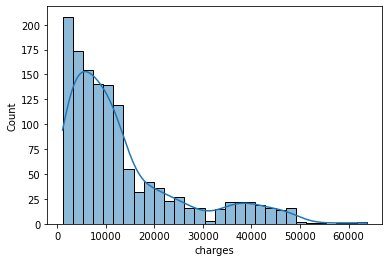

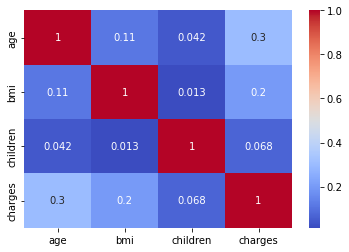

In [43]:
# Displaying the first few rows of the dataset
data.head()

# Checking the shape of the dataset
data.shape

# Checking for missing values
data.isnull().sum()

# Basic statistical summary of the numerical columns
data.describe()

# Exploring the distribution of the target variable
sns.histplot(data['charges'], kde=True)
plt.show()

# Visualizing the correlation between numerical features
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [44]:
# Displaying the first few rows of the dataset
print(data.head())

# Checking the information of the dataset
print(data.info())

# Descriptive statistics of the dataset
print(data.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [45]:
# Handling missing values (if any)
data.dropna(inplace=True)

# Converting categorical variables into numerical representation
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Splitting the data into features (X) and target variable (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Creating an instance of the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Absolute Error: 4181.19447375365
Mean Squared Error: 33596915.851361446
R2 Score: 0.7835929767120724


In [47]:
# Example prediction
example_data = [[30, 25.0, 2, 1, 0, 0, 1, 0]]
predicted_cost = model.predict(example_data)
print("Predicted Insurance Cost:", predicted_cost)


Predicted Insurance Cost: [4379.46750217]


C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
